In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Time Evolution of $\sigma$ Two-point Correlator

In [ ]:
sigma2pt = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/sigma2pt/sigma2pt.npy")
N = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/sigma2pt/N.npy")

In [ ]:
#Analytical solution 

import scipy as sc
from mpmath import * 
mp.dps = 25; mp.pretty = True

def Hankel1(order, x):
    n = len(x)
    H = []
    for i in range(n):
        H.append(hankel1(order, x[i]))
    return np.asarray(H)

def sigma2pt_analytical(mu, N):
    H = 1
    tau = -np.exp(-N)/H
    y = np.sqrt(np.pi)/2 * H * np.exp(-1j * np.pi/4 - np.pi*mu/4) * (-tau)**(3/2) * Hankel1(order = 1j*mu, x = tau)
    return np.abs(y)**2

In [ ]:
m2_array = np.linspace(0, 9/2, 10)
mu = 1.5
#x range
H, k = 1, 1
x = N
sigma2_analytical = sigma2pt_analytical(mu, N)
#alpha range
alpha_min = np.sqrt(m2_array[0])
alpha_max = np.sqrt(m2_array[-1])
alpha_number = len(m2_array)
alpha = np.linspace(alpha_min, alpha_max, alpha_number)


#Initialize plot
fig = plt.figure(figsize = (7, 3))
fig.subplots_adjust(bottom = 0.15)
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(bottom = "on", top = "on", left = "on", right = "on")
ax.set_yticks([0, 1, 2, 3])

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

plt.axvline(0, color = 'grey', linestyle = '--', linewidth = 0.8)
#plt.text(0, 0.3, "$\omega\sim H$", ha = 'center', va = 'center', rotation = 'vertical', backgroundcolor = 'white')
plt.text(-3, 3, "$\omega\gg H$", ha = 'center', va = 'center')
plt.text(18, 3, "$\omega\ll H$", ha = 'center', va = 'center')

#Initialize min and max value for alpha
norm = matplotlib.colors.Normalize(vmin = alpha_min, vmax = alpha_max)
#Choose a colormap
c_m = matplotlib.cm.coolwarm
#Initialize the colorbar
s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])
cb = plt.colorbar(s_m, shrink = 0.8, ticks = [0, 1, 2])
#Colorbar label with position
cb.set_label("$m/H$", y = 1.12, rotation = 0, labelpad = -12, fontsize = 12)

#Loop on alpha values
for i in range(alpha_number):
    m2 = m2_array[i]
    rho = np.sqrt(9/2 - m2)
    y = sigma2pt[i]
    ax.plot(N, y*np.exp(3*N)/(y[-1]*np.exp(3*N[-1])), color = s_m.to_rgba(alpha[i]))
    

#Labels
ax.plot(N, sigma2_analytical*np.exp(3*N)/(sigma2_analytical[-1]*np.exp(3*N[-1])), color = "k", linestyle = "--", linewidth = 1)
ax.set_title("$\mu_{\mathrm{eff}} = 1.5$", fontsize = 12)
ax.set_xlabel("$N = -\log(-H \\tau)$", fontsize = 12)
ax.set_ylabel("$a^3\langle \sigma_k \sigma_{-k}\\rangle'$", fontsize = 12)
ax.set_xlim(-5, 20)
plt.show()

## Phase Diagram of the Gaussian Theory

In [ ]:
P0 = 0.5 #Value of the power spectrum for rho=0

P = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/P.npy")
m = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/m.npy")
rho = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/rho.npy")

In [ ]:
from matplotlib import cm
from pylab import contour, clabel

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top = 0.82)

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", which = 'minor', direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim((np.min(m), np.max(m)))
ax.set_ylim((np.min(rho), np.max(rho)))

X, Y = np.meshgrid(m, rho)

ax.plot(m, m**2, ls = "--", color = "k", label = "$M/H = 1$", alpha = 0.5)
im = ax.pcolormesh(X, Y, (P/P0), cmap = "coolwarm")
cb = plt.colorbar(im, shrink = 0.8)
cb.set_ticks([10, 20, 30, 40, 50, 60])
cb.set_label("$\\frac{\Delta_\zeta^2}{\Delta_{\zeta, 0}^2}$", fontsize = 20, rotation = 0, y = 0.6, labelpad = 25)
ax.set_xlabel("$m/H$", fontsize = 15)
ax.set_ylabel("$\\rho/H$", fontsize = 15)

ax.semilogx(m[25], rho[0], "o", markersize = 5, color = "grey")
ax.semilogx(m[50], rho[50], "o", markersize = 5, color = "grey")
ax.semilogx(m[74], rho[-1], "o", markersize = 5, color = "grey")

ax.legend(frameon = False, loc = 'upper center', bbox_to_anchor = (0.5, 1.15))

In [ ]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top = 0.82, left = 0.3)

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", which = 'major', direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xscale("log")
ax.set_xlim((np.min(m), np.max(m)))
ax.set_ylim((-2, 28))


ax.semilogx(m, np.transpose(P)[-1]/P0, color = "C0", alpha = 1, ls = "-", label = "$\\rho/H = 10$")
ax.semilogx(m[74], np.transpose(P)[-1][74]/P0, "o", markersize = 5, color = "grey")

ax.semilogx(m, np.transpose(P)[50]/P0, color = "C0", alpha = 0.75, ls = "--", label = "$\\rho/H = 1$")
ax.semilogx(m[49], np.transpose(P)[50][49]/P0, "o", markersize = 5, color = "grey")

ax.semilogx(m, np.transpose(P)[0]/P0, color = "C0", alpha = 0.75, ls = "dotted", label = "$\\rho/H = 0.1$")
ax.semilogx(m[25], np.transpose(P)[0][25]/P0, "o", markersize = 5, color = "grey")

ax.legend(frameon = False)
ax.set_xlabel("$m/H$", fontsize = 15)
ax.set_ylabel("$\\frac{\Delta_\zeta^2}{\Delta_{\zeta, 0}^2}$", fontsize = 20, rotation = 0, y = 0.4, labelpad = 20)

## Phase Diagram of the Cubic Theory

$(\partial_i \pi_c)^2 \sigma$ interaction

In [ ]:
m = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/m.npy")
rho = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/rho.npy")
Shape_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/Shape_kappa1.npy")

In [ ]:
import matplotlib.colors as colors
from matplotlib import cm
from pylab import contour, clabel

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top = 0.82)
fig.subplots_adjust(bottom = 0.2)

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", which = 'minor', direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim((np.min(m), np.max(m)))
ax.set_ylim((np.min(rho), np.max(rho)))

X, Y = np.meshgrid(m, rho)

ax.plot(m, m**2, ls = "--", color = "k", alpha = 0.5)

Z = np.transpose(Shape_kappa1)*np.transpose(X)
im = ax.pcolormesh(X, Y, Z, cmap = "coolwarm", norm=colors.SymLogNorm(linthresh=0.0001, linscale=0.0001,
                                              vmin=1e-4, vmax=5, base=10))

cb = plt.colorbar(im, shrink = 0.8)
cb.set_ticks([1e-3, 1e-2, 1e-1, 1])
ax.set_title("$f_{\mathrm{NL}}^{(\partial_i\pi_c)^2\sigma}$", fontsize = 15, y = 1.05)
ax.set_xlabel("$m/H$", fontsize = 15)
ax.set_ylabel("$\\rho/H$", fontsize = 15)

ax.legend(frameon = False, loc = 'lower right')

$\dot{\pi}_c^2 \sigma$ interaction

In [ ]:
m = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/m.npy")
rho = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/rho.npy")
Shape_kappa2 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/Shape_kappa2.npy")

In [ ]:
from matplotlib import cm
from pylab import contour, clabel

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top = 0.82)
fig.subplots_adjust(bottom = 0.2)

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", which = 'minor', direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim((np.min(m), np.max(m)))
ax.set_ylim((np.min(rho), np.max(rho)))

X, Y = np.meshgrid(m, rho)

ax.plot(m, m**2, ls = "--", color = "k", alpha = 0.5)

Z = -np.transpose(Shape_kappa2)
im = ax.pcolormesh(X, Y, Z, cmap = "coolwarm", norm=colors.SymLogNorm(linthresh=0.001, linscale=0.001,
                                              vmin=-0.3, vmax=0.3, base=10))

ax.contour(X[:65, :85], Y[:65, :85], np.transpose(Shape_kappa2)[:65, :85], levels = [0], colors = ['black'], linewidths = 0.5, linestyles = "dotted")
cb = plt.colorbar(im, shrink = 0.8)
cb.set_ticks([-1e-1, -1e-2, 0, 1e-2, 1e-1])
ax.set_title("$\left(\\frac{\\tilde{\\rho}}{H}\\right)^{-1}\\times f_{\mathrm{NL}}^{\dot{\pi}_c^2\sigma}$", fontsize = 15, y = 1.05)
ax.set_xlabel("$m/H$", fontsize = 15)
ax.set_ylabel("$\\rho/H$", fontsize = 15)

ax.legend(frameon = False, loc = 'lower right')

$\sigma^3$ interaction

In [ ]:
m = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/m.npy")
rho = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/rho.npy")
Shape_mu = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/Shape_mu.npy")

In [ ]:
from matplotlib import cm
from pylab import contour, clabel
from scipy.signal import savgol_filter
import scipy as sp
import scipy.ndimage

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top = 0.82)
fig.subplots_adjust(bottom = 0.2)

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", which = 'minor', direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim((np.min(m), np.max(m)))
ax.set_ylim((np.min(rho), np.max(rho)))

X, Y = np.meshgrid(m, rho)

ax.plot(m, m**2, ls = "--", color = "k", alpha = 0.5)

Z = -np.transpose(Shape_mu) * np.sqrt( np.transpose((P)/P0)/(4*np.pi**2 * 2.2e-9) )

y = sp.ndimage.filters.gaussian_filter(Z, [10, 1], mode = 'constant')
z = savgol_filter(y, 21, 5)

im = ax.pcolormesh(X, Y, z, cmap = "coolwarm", norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1,
                                              vmin=-1e5, vmax=1e2, base=10))


ax.contour(X[:, :78], Y[:, :78], z[:, :78], levels = [0], colors = ['black'], linewidths = 0.5, linestyles = "dotted")
cb = plt.colorbar(im, shrink = 0.8)
cb.set_ticks([-1e4, -1e3, -1e2, -1e1, -1, 0, 1, 10])
ax.set_title("$\left(\\frac{\mu}{H}\\right)^{-1}\\times f_{\mathrm{NL}}^{\sigma^3}$", fontsize = 15, y = 1.05)
ax.set_xlabel("$m/H$", fontsize = 15)
ax.set_ylabel("$\\rho/H$", fontsize = 15)

ax.legend(frameon = False, loc = 'lower right')

$\dot{\pi}_c \sigma^2$ interaction

In [ ]:
m = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/m.npy")
rho = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/rho.npy")
Shape_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/PhaseDiagrams/Shape_alpha.npy")

In [ ]:
from matplotlib import cm
from pylab import contour, clabel

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top = 0.82)
fig.subplots_adjust(bottom = 0.2)

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", which = 'minor', direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim((np.min(m), np.max(m)))
ax.set_ylim((np.min(rho), np.max(rho)))

X, Y = np.meshgrid(m, rho)

ax.plot(m, m**2, ls = "--", color = "k", label = "$M/H = 1$", alpha = 0.5)

Z = 4 * np.transpose(Shape_alpha)
im = ax.pcolormesh(X, Y, Z, cmap = "coolwarm", norm=colors.SymLogNorm(linthresh=0.001, linscale=0.001,
                                              vmin=-3, vmax=3, base=10))


ax.contour(X[:65, :85], Y[:65, :85], np.transpose(Shape_alpha)[:65, :85], levels = [0], colors = ['black'], linewidths = 0.5, linestyles = "dotted")
cb = plt.colorbar(im, shrink = 0.8)
cb.set_ticks([-1, -1e-1, -1e-2, 0, 1e-2, 1e-1, 1])
ax.set_title("$\\tilde{\\alpha}^{-2} \\times f_{\mathrm{NL}}^{\dot{\pi}_c\sigma^2}$", fontsize = 15, y = 1.05)
ax.set_xlabel("$m/H$", fontsize = 15)
ax.set_ylabel("$\\rho/H$", fontsize = 15)

ax.legend(frameon = False, loc = 'lower right')

## Phase Diagram Slices

At fixed $\rho/H$

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax1.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax1.tick_params(left = "on", right = "on", direction = "in")
ax1.tick_params(axis = 'both', labelsize = 10)
ax2.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax2.tick_params(left = "on", right = "on", direction = "in")
ax2.tick_params(axis = 'both', labelsize = 10)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlim((np.min(m), np.max(m)))
ax2.set_xlim((np.min(m), np.max(m)))

ax1.set_ylim((-2.5, 5.5))
ax2.set_ylim((-0.26, 0.35))

ax1.set_xlabel("$m/H$", fontsize = 12)
ax1.set_ylabel("$f_{\mathrm{NL}}$", fontsize = 12)
ax2.set_xlabel("$m/H$", fontsize = 12)
ax2.set_ylabel("$f_{\mathrm{NL}}$", fontsize = 12)

#rho/H = 0.1
ax1.semilogx(m, np.transpose(Shape_kappa1)[0]*2, label = "$\left(\\frac{\\rho}{H}\\right)^{-1}\\times f_{\mathrm{NL}}^{(\partial_i \pi_c)^2\sigma}$", ls = "-", alpha = 0.8)
ax1.semilogx(m, -np.transpose(Shape_kappa2)[0]*2, label = "$\left(\\frac{\\tilde{\\rho}}{H}\\right)^{-1} \\times f_{\mathrm{NL}}^{\dot{\pi}_c^2\sigma}$", ls = "--")
ax1.semilogx(m, -np.transpose(Shape_mu)[0] * np.sqrt( np.transpose((P)[0]/P0)/(4*np.pi**2 * 2.2e-9) )/5 * np.sqrt(2.2e-9), label = "$\Delta_\zeta\left(\\frac{\mu}{H}\\right)^{-1}\\times f_{\mathrm{NL}}^{\sigma^3}$", ls = "dotted")
ax1.semilogx(m, 4 * np.transpose(Shape_alpha)[0], label = "$\\tilde{\\alpha}^{-2} \\times f_{\mathrm{NL}}^{\dot{\pi}_c\sigma^2}$", ls = "-", alpha = 0.8)
ax1.set_title("$\\rho/H = 0.1$", fontsize = 12)
ax1.legend(frameon = False)

#rho/H = 2
ax2.semilogx(m, np.transpose(Shape_kappa1)[65], ls = "-", alpha = 0.8)
ax2.semilogx(m, -np.transpose(Shape_kappa2)[65], ls = "--")
ax2.semilogx(m, -np.transpose(Shape_mu)[65] * np.sqrt( np.transpose((P)[65]/P0)/(4*np.pi**2 * 2.2e-9) ) * np.sqrt(2.2e-9), ls = "dotted")
ax2.semilogx(m, 4 * np.transpose(Shape_alpha)[65], ls = "-", alpha = 0.8)
ax2.set_title("$\\rho/H = 2$", fontsize = 12)



At fixed $m/H$

In [ ]:
from scipy.signal import savgol_filter

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax1.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax1.tick_params(left = "on", right = "on", direction = "in")
ax1.tick_params(axis = 'both', labelsize = 10)
ax2.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax2.tick_params(left = "on", right = "on", direction = "in")
ax2.tick_params(axis = 'both', labelsize = 10)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlim((np.min(m), np.max(m)))
ax2.set_xlim((np.min(m), np.max(m)))

ax2.set_yticks((-0.02, 0, 0.02, 0.04))

ax1.set_xlabel("$\\rho/H$", fontsize = 12)
ax1.set_ylabel("$f_{\mathrm{NL}}$", fontsize = 12)
ax2.set_xlabel("$\\rho/H$", fontsize = 12)
ax2.set_ylabel("$f_{\mathrm{NL}}$", fontsize = 12)

#m/H = 1
ax1.semilogx(rho, np.transpose(np.transpose(Shape_kappa1))[50], ls = "-", alpha = 0.8)
ax1.semilogx(rho, np.transpose(-np.transpose(Shape_kappa2))[50], ls = "--")
ax1.semilogx(rho, np.transpose(-np.transpose(Shape_mu) * np.sqrt( np.transpose((P)/P0)/(4*np.pi**2 * 2.2e-9) ) * np.sqrt(2.2e-9))[50], ls = "dotted")
ax1.semilogx(rho, np.transpose(4 * np.transpose(Shape_alpha))[50], ls = "-", alpha = 0.8)
ax1.set_title("$m/H = 1$", fontsize = 12)

#m/H = 2
ax2.semilogx(rho, np.transpose(np.transpose(Shape_kappa1))[65]/10, ls = "-", alpha = 0.8)
ax2.semilogx(rho, np.transpose(-np.transpose(Shape_kappa2))[65], ls = "--")
ax2.semilogx(rho, np.transpose(-np.transpose(Shape_mu) * np.sqrt( np.transpose((P)/P0)/(4*np.pi**2 * 2.2e-9) ) * np.sqrt(2.2e-9))[65], ls = "dotted")

shape_smoothed = savgol_filter(np.transpose(4 * np.transpose(Shape_alpha))[65], 31, 5)
ax2.semilogx(rho, shape_smoothed, ls = "-", alpha = 0.8)
ax2.set_title("$m/H = 2$", fontsize = 12)

## Cosmological Collider Signals at Strong Mixing

$\mu_{\text{eff}} = 2$

In [ ]:
kappa_mueff2_rho01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff2_rho01_kappa1.npy")
Shape_mueff2_rho01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff2_rho01_kappa1.npy")

kappa_mueff2_rho1_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff2_rho1_kappa1.npy")
Shape_mueff2_rho1_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff2_rho1_kappa1.npy")

kappa_mueff2_rho2_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff2_rho2_kappa1.npy")
Shape_mueff2_rho2_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff2_rho2_kappa1.npy")

kappa_mueff2_rho01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff2_rho01_alpha.npy")
Shape_mueff2_rho01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff2_rho01_alpha.npy")

kappa_mueff2_rho1_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff2_rho1_alpha.npy")
Shape_mueff2_rho1_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff2_rho1_alpha.npy")

kappa_mueff2_rho2_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff2_rho2_alpha.npy")
Shape_mueff2_rho2_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff2_rho2_alpha.npy")


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax1.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax1.tick_params(left = "on", right = "on", direction = "in")
ax1.tick_params(axis = 'both', labelsize = 10)
ax2.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax2.tick_params(left = "on", right = "on", direction = "in")
ax2.tick_params(axis = 'both', labelsize = 10)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlim(1e-3, 1)
ax2.set_xlim(1e-3, 1)
ax1.set_ylim(-0.7, 4.5)


ax1.set_xlabel("$k_3/k_1$", fontsize = 12)
ax1.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)
ax2.set_xlabel("$k_3/k_1$", fontsize = 12)
ax2.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)

#kappa1
ax1.semilogx(kappa_mueff2_rho01_kappa1, Shape_mueff2_rho01_kappa1/kappa_mueff2_rho01_kappa1/np.absolute(Shape_mueff2_rho01_kappa1[-1]), label = "$\\rho/H=0.1$", ls = "dotted", alpha = 1, color = "C0")
ax1.semilogx(kappa_mueff2_rho1_kappa1, Shape_mueff2_rho1_kappa1/kappa_mueff2_rho1_kappa1/np.absolute(Shape_mueff2_rho1_kappa1[-1]), label = "$\\rho/H=1$", ls = "--", alpha = 0.8, color = "C3")
ax1.semilogx(kappa_mueff2_rho2_kappa1, Shape_mueff2_rho2_kappa1/kappa_mueff2_rho2_kappa1/np.absolute(Shape_mueff2_rho2_kappa1[-1]), label = "$\\rho/H=2$", ls = "-", alpha = 0.6, color = "C2")
ax1.set_title("$(\partial_i \pi_c)^2\sigma$", fontsize = 12)
ax1.legend(frameon = False, loc = "upper right")

#alpha
ax2.semilogx(kappa_mueff2_rho01_alpha, Shape_mueff2_rho01_alpha/kappa_mueff2_rho01_alpha/np.absolute(Shape_mueff2_rho01_alpha[-1]), ls = "dotted", alpha = 1, color = "C0", label = "$\\rho/H=0.1$")
ax2.semilogx(kappa_mueff2_rho1_alpha, Shape_mueff2_rho1_alpha/kappa_mueff2_rho1_alpha/np.absolute(Shape_mueff2_rho1_alpha[-1]), ls = "--", alpha = 0.8, color = "C3", label = "$\\rho/H=1$")
ax2.semilogx(kappa_mueff2_rho2_alpha, Shape_mueff2_rho2_alpha/kappa_mueff2_rho2_alpha/np.absolute(Shape_mueff2_rho2_alpha[-1]), ls = "-", alpha = 0.5, color = "C2", label = "$\\rho/H=2$")
ax2.set_title("$\dot{\pi}_c\sigma^2$", fontsize = 12)
ax2.legend(frameon = False, loc = "upper right")

$\mu_{\text{eff}} = 5$

In [ ]:
kappa_mueff5_rho01_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff5_rho01_cs01_kappa1.npy")
Shape_mueff5_rho01_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff5_rho01_cs01_kappa1.npy")

kappa_mueff5_rho1_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff5_rho1_cs01_kappa1.npy")
Shape_mueff5_rho1_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff5_rho1_cs01_kappa1.npy")

kappa_mueff5_rho5_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff5_rho5_cs01_kappa1.npy")
Shape_mueff5_rho5_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff5_rho5_cs01_kappa1.npy")

kappa_mueff5_rho01_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff5_rho01_cs01_alpha.npy")
Shape_mueff5_rho01_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff5_rho01_cs01_alpha.npy")

kappa_mueff5_rho1_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff5_rho1_cs01_alpha.npy")
Shape_mueff5_rho1_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff5_rho1_cs01_alpha.npy")

kappa_mueff5_rho5_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/kappa_mueff5_rho5_cs01_alpha.npy")
Shape_mueff5_rho5_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CCStrongMixing/Shape_mueff5_rho5_cs01_alpha.npy")


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax1.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax1.tick_params(left = "on", right = "on", direction = "in")
ax1.tick_params(axis = 'both', labelsize = 10)
ax2.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax2.tick_params(left = "on", right = "on", direction = "in")
ax2.tick_params(axis = 'both', labelsize = 10)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlim(1e-3, 1)
ax2.set_xlim(1e-3, 1)
ax1.set_ylim(0.5, 4.5)
ax2.set_ylim(0.8, 2.3)
ax2.set_yticks([1, 1.5, 2])


ax1.set_xlabel("$k_3/k_1$", fontsize = 12)
ax1.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)
ax2.set_xlabel("$k_3/k_1$", fontsize = 12)
ax2.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)

#kappa1
ax1.semilogx(kappa_mueff5_rho01_cs01_kappa1, Shape_mueff5_rho01_cs01_kappa1/kappa_mueff5_rho01_cs01_kappa1/np.absolute(Shape_mueff5_rho01_cs01_kappa1[-1]), label = "$\\rho/H=0.1$", ls = "dotted", alpha = 1, color = "C0")
ax1.semilogx(kappa_mueff5_rho1_cs01_kappa1, Shape_mueff5_rho1_cs01_kappa1/kappa_mueff5_rho1_cs01_kappa1/np.absolute(Shape_mueff5_rho1_cs01_kappa1[-1]), label = "$\\rho/H=1$", ls = "--", alpha = 0.8, color = "C3")
ax1.semilogx(kappa_mueff5_rho5_cs01_kappa1, Shape_mueff5_rho5_cs01_kappa1/kappa_mueff5_rho5_cs01_kappa1/np.absolute(Shape_mueff5_rho5_cs01_kappa1[-1]), label = "$\\rho/H=5$", ls = "-", alpha = 0.6, color = "C2")
ax1.set_title("$(\partial_i \pi_c)^2\sigma$", fontsize = 12)
ax1.legend(frameon = False, loc = "lower left")

#alpha
ax2.semilogx(kappa_mueff5_rho01_cs01_alpha, Shape_mueff5_rho01_cs01_alpha/kappa_mueff5_rho01_cs01_alpha/np.absolute(Shape_mueff5_rho01_cs01_alpha[-1]), ls = "dotted", alpha = 1, color = "C0", label = "$\\rho/H=0.1$")
ax2.semilogx(kappa_mueff5_rho1_cs01_alpha, Shape_mueff5_rho1_cs01_alpha/kappa_mueff5_rho1_cs01_alpha/np.absolute(Shape_mueff5_rho1_cs01_alpha[-1]), ls = "--", alpha = 0.8, color = "C3", label = "$\\rho/H=1$")
ax2.semilogx(kappa_mueff5_rho5_cs01_alpha, Shape_mueff5_rho5_cs01_alpha/kappa_mueff5_rho5_cs01_alpha/np.absolute(Shape_mueff5_rho5_cs01_alpha[-1]), ls = "-", alpha = 0.5, color = "C2", label = "$\\rho/H=5$")
ax2.set_title("$\dot{\pi}_c\sigma^2$", fontsize = 12)
ax2.legend(frameon = False, loc = "lower left")


## Sound Speed Collider 

In [ ]:
kappa_mueff4_rho4_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/kappa_mueff4_rho4_cs01_kappa1.npy")
Shape_mueff4_rho4_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/Shape_mueff4_rho4_cs01_kappa1.npy")

kappa_mueff4_rho4_cs1_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/kappa_mueff4_rho4_cs1_kappa1.npy")
Shape_mueff4_rho4_cs1_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/Shape_mueff4_rho4_cs1_kappa1.npy")

kappa_mueff4_rho4_cs10_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/kappa_mueff4_rho4_cs10_kappa1.npy")
Shape_mueff4_rho4_cs10_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/Shape_mueff4_rho4_cs10_kappa1.npy")


kappa_mueff4_rho4_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/kappa_mueff4_rho4_cs01_alpha.npy")
Shape_mueff4_rho4_cs01_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/Shape_mueff4_rho4_cs01_alpha.npy")

kappa_mueff4_rho4_cs1_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/kappa_mueff4_rho4_cs1_alpha.npy")
Shape_mueff4_rho4_cs1_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/Shape_mueff4_rho4_cs1_alpha.npy")

kappa_mueff4_rho4_cs10_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/kappa_mueff4_rho4_cs10_alpha.npy")
Shape_mueff4_rho4_cs10_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/SoundSpeedCollider/Shape_mueff4_rho4_cs10_alpha.npy")


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax1.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax1.tick_params(left = "on", right = "on", direction = "in")
ax1.tick_params(axis = 'both', labelsize = 10)
ax2.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax2.tick_params(left = "on", right = "on", direction = "in")
ax2.tick_params(axis = 'both', labelsize = 10)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlim(1e-3, 1)
ax2.set_xlim(1e-3, 1)
ax1.set_ylim(0.5, 7)
ax1.set_yticks([2, 4, 6])
ax2.set_ylim(-0.5, 4.5)
ax2.set_yticks([0, 2, 4])


ax1.set_xlabel("$k_3/k_1$", fontsize = 12)
ax1.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)
ax2.set_xlabel("$k_3/k_1$", fontsize = 12)
ax2.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)

#kappa1
ax1.semilogx(kappa_mueff4_rho4_cs01_kappa1, Shape_mueff4_rho4_cs01_kappa1/kappa_mueff4_rho4_cs01_kappa1/Shape_mueff4_rho4_cs01_kappa1[-1], label = "$c_s=0.1$", ls = "dotted", alpha = 1, color = "C0")
ax1.semilogx(kappa_mueff4_rho4_cs1_kappa1, Shape_mueff4_rho4_cs1_kappa1/kappa_mueff4_rho4_cs1_kappa1/Shape_mueff4_rho4_cs1_kappa1[-1], label = "$c_s=1$", ls = "--", alpha = 0.8, color = "C3")
ax1.semilogx(kappa_mueff4_rho4_cs10_kappa1, Shape_mueff4_rho4_cs10_kappa1/kappa_mueff4_rho4_cs10_kappa1/Shape_mueff4_rho4_cs10_kappa1[-1], label = "$c_s=10$", ls = "-", alpha = 0.6, color = "C2")
ax1.set_title("$(\partial_i \pi_c)^2\sigma$", fontsize = 12)
ax1.legend(frameon = False, loc = "upper left", ncol = 3)


#alpha
ax2.semilogx(kappa_mueff4_rho4_cs01_alpha, Shape_mueff4_rho4_cs01_alpha/kappa_mueff4_rho4_cs01_alpha/Shape_mueff4_rho4_cs01_alpha[-1], ls = "dotted", alpha = 1, color = "C0", label = "$c_s=0.1$")
ax2.semilogx(kappa_mueff4_rho4_cs1_alpha, Shape_mueff4_rho4_cs1_alpha/kappa_mueff4_rho4_cs1_alpha/Shape_mueff4_rho4_cs1_alpha[-1], ls = "--", alpha = 0.8, color = "C3", label = "$c_s=1$")
ax2.semilogx(kappa_mueff4_rho4_cs10_alpha, Shape_mueff4_rho4_cs10_alpha/kappa_mueff4_rho4_cs10_alpha/Shape_mueff4_rho4_cs10_alpha[-1], ls = "-", alpha = 0.6, color = "C2", label = "$c_s=10$")
ax2.set_title("$\dot{\pi}_c\sigma^2$", fontsize = 12)
#ax2.legend(frameon = False, loc = "upper left", ncol = 3)

## Low Speed Collider

In [ ]:
kappa_mueff2_rho01_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/kappa_mueff2_rho01_cs01_kappa1.npy")
Shape_mueff2_rho01_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/Shape_mueff2_rho01_cs01_kappa1.npy")

kappa_mueff2_rho1_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/kappa_mueff2_rho1_cs01_kappa1.npy")
Shape_mueff2_rho1_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/Shape_mueff2_rho1_cs01_kappa1.npy")

kappa_mueff2_rho25_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/kappa_mueff2_rho25_cs01_kappa1.npy")
Shape_mueff2_rho25_cs01_kappa1 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/Shape_mueff2_rho25_cs01_kappa1.npy")


kappa_mueff2_rho01_cs001_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/kappa_mueff2_rho01_cs001_alpha.npy")
Shape_mueff2_rho01_cs001_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/Shape_mueff2_rho01_cs001_alpha.npy")

kappa_mueff2_rho1_cs001_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/kappa_mueff2_rho1_cs001_alpha.npy")
Shape_mueff2_rho1_cs001_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/Shape_mueff2_rho1_cs001_alpha.npy")

kappa_mueff2_rho25_cs001_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/kappa_mueff2_rho25_cs001_alpha.npy")
Shape_mueff2_rho25_cs001_alpha = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LowSpeedCollider/Shape_mueff2_rho25_cs001_alpha.npy")


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharex = False)
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax1.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax1.tick_params(left = "on", right = "on", direction = "in")
ax1.tick_params(axis = 'both', labelsize = 10)
ax2.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax2.tick_params(left = "on", right = "on", direction = "in")
ax2.tick_params(axis = 'both', labelsize = 10)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlim(1e-2, 1)
ax2.set_xlim(1e-3, 1)
ax1.set_ylim(-0.1, 1.3)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 1, 2, 3])


ax1.set_xlabel("$k_3/k_1$", fontsize = 12)
ax1.set_ylabel("$S(k_1, k_1, k_3)$", fontsize = 12)
ax2.set_xlabel("$k_3/k_1$", fontsize = 12)
ax2.set_ylabel("$S(k_1, k_1, k_3)$", fontsize = 12)

#kappa1
ax1.semilogx(kappa_mueff2_rho01_cs01_kappa1, Shape_mueff2_rho01_cs01_kappa1/Shape_mueff2_rho01_cs01_kappa1[-1], label = "$\\rho/H=0.1$", ls = "dotted", alpha = 1, color = "C0")
ax1.semilogx(kappa_mueff2_rho1_cs01_kappa1, Shape_mueff2_rho1_cs01_kappa1/Shape_mueff2_rho1_cs01_kappa1[-1], label = "$\\rho/H=1$", ls = "--", alpha = 0.8, color = "C3")
ax1.semilogx(kappa_mueff2_rho25_cs01_kappa1, Shape_mueff2_rho25_cs01_kappa1/Shape_mueff2_rho25_cs01_kappa1[-1], label = "$\\rho/H=2.5$", ls = "-", alpha = 0.6, color = "C2")

ax1.set_title("$(\partial_i \pi_c)^2\sigma$", fontsize = 12)
ax1.legend(frameon = False, loc = "lower right")
ax1.text(x = 0.015, y = 1, s = "$c_s=0.1$")

#alpha
ax2.semilogx(kappa_mueff2_rho01_cs001_alpha, Shape_mueff2_rho01_cs001_alpha/Shape_mueff2_rho01_cs001_alpha[-1], ls = "dotted", alpha = 1, color = "C0", label = "$\\rho/H=0.1$")
ax2.semilogx(kappa_mueff2_rho1_cs001_alpha, Shape_mueff2_rho1_cs001_alpha/Shape_mueff2_rho1_cs001_alpha[-1], ls = "--", alpha = 0.8, color = "C3", label = "$\\rho/H=1$")
ax2.semilogx(kappa_mueff2_rho25_cs001_alpha, Shape_mueff2_rho25_cs001_alpha/Shape_mueff2_rho25_cs001_alpha[-1], ls = "-", alpha = 0.5, color = "C2", label = "$\\rho/H=2.5$")

ax2.set_title("$\dot{\pi}_c\sigma^2$", fontsize = 12)
ax2.text(x = 0.0015, y = 2.66, s = "$c_s=0.01$")

## Cosmological Collider Flow

$\mu_{\text{eff}}=5, \rho/H=0.1, c_s=0.1$ double-exchange diagram

In [10]:
kappa = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CosmologicalColliderFlow/kappa_movie_mueff5_rho01_cs01_alpha.npy")
Shape_time = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CosmologicalColliderFlow/Shape_movie_mueff5_rho01_cs01_alpha.npy")


In [11]:
Shapes = []
for i in range(len(Shape_time[0])):
    X = []
    for j in range(len(Shape_time)):
        X.append(Shape_time[j][i])
    Shapes.append(X)

In [12]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xscale("log")
ax.set_xlim(1e-3, 1)
ax.set_ylim(0.8, 2.2)
ax.set_yticks([1, 1.5, 2])

ax.set_xlabel("$k_3/k_1$", fontsize = 12)
ax.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)
ax.set_title("$\dot{\pi}_c \sigma^2$", fontsize = 12)

x = kappa
line, = ax.semilogx(kappa, Shapes[-1]/Shapes[-1][-1]/kappa, color = "C2", alpha = 0.8)

N_exit = 0
DeltaN = 7
Ni, Nf = N_exit - DeltaN, 20
N = np.linspace(Ni, Nf, 1000)

def animate(i):
    line.set_ydata(Shapes[i]/Shapes[i][-1]/kappa)  # update the data   
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask = True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(200, 500), init_func = init,
                              interval = 10, blit = True, repeat = True)

ax.semilogx(kappa, Shapes[-1]/Shapes[-1][-1]/kappa, ls = "--", color = "k")
plt.show()

In [ ]:
# writergif = animation.PillowWriter(fps=30)
# ani.save('CosmologicalColliderFlow.gif', writer = 'writergif')

In [13]:
N_exit, DeltaN = 0, 7
Ni, Nf, N_point = N_exit - DeltaN, 20, 1000
N_array = np.linspace(Ni, Nf, N_point)

#efold range
N_min = 200
N_max = 500
N_number = 100
N = np.linspace(N_min, N_max, N_number)

#Initialize plot
fig = plt.figure(figsize = (7, 3))
fig.subplots_adjust(bottom = 0.15)
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(bottom = "on", top = "on", left = "on", right = "on")
ax.set_ylim(0.8, 2.2)
ax.set_yticks([1, 1.5, 2])

ax.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax.tick_params(left = "on", right = "on", direction = "in")
ax.tick_params(axis = 'both', labelsize = 10)

#Initialize min and max value for alpha
norm = matplotlib.colors.Normalize(vmin = 0, vmax = 6)#N_array[N_min], vmax = N_array[N_max])
#Choose a colormap
c_m = matplotlib.cm.coolwarm
#Initialize the colorbar
s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])
cb = plt.colorbar(s_m, shrink = 0.8)#, ticks = [0, 1, 2])
#Colorbar label with position
cb.set_label("$N_{\mathrm{S}} - N_{\mathrm{L}}$", y = 1.12, rotation = 0, labelpad = -8, fontsize = 12)

#Loop on alpha values
for i in N:
    i = int(i)
    ax.semilogx(kappa, Shapes[i]/Shapes[i][-1]/kappa, color = s_m.to_rgba(N_array[i]))
    
ax.semilogx(kappa, Shapes[-1]/Shapes[-1][-1]/kappa, ls = "--", color = "k")

#Labels
ax.set_title("$\dot{\pi}_c \sigma^2$", fontsize = 12)
ax.set_xlabel("$k_3/k_1$", fontsize = 12)
ax.set_ylabel("$(k_1/k_3)S(k_1, k_2, k_3)$", fontsize = 12)
ax.set_xlim(1e-3, 1)
plt.show()

## Correlated Sharp Features

In [ ]:
k = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/k.npy")

P_FullTheory_muc01_mu2 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/P_FullTheory_muc01_mu2.npy")
P_FullTheory_muc01_mu5 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/P_FullTheory_muc01_mu5.npy")

fNL_FullTheory_muc01_mu2 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/fNL_FullTheory_muc01_mu2.npy")
fNL_FullTheory_muc01_mu5 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/fNL_FullTheory_muc01_mu5.npy")

P_SingleFieldTheory_muc01_mu2 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/P_SingleFieldTheory_muc01_mu2.npy")
P_SingleFieldTheory_muc01_mu5 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/P_SingleFieldTheory_muc01_mu5.npy")

fNL_SingleFieldTheory_muc01_mu2 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/fNL_SingleFieldTheory_muc01_mu2.npy")
fNL_SingleFieldTheory_muc01_mu5 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/CorrelatedSharpFeatures/fNL_SingleFieldTheory_muc01_mu5.npy")


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
fig.subplots_adjust(top = 0.9, bottom = 0.2, wspace = 0.3)

ax1.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax1.tick_params(left = "on", right = "on", direction = "in")
ax1.tick_params(axis = 'both', labelsize = 10)
ax2.tick_params(bottom = "on", top = "on", which = 'minor', direction = "in")
ax2.tick_params(left = "on", right = "on", direction = "in")
ax2.tick_params(axis = 'both', labelsize = 10)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlim(0.2, np.max(k))
ax2.set_xlim(0.2, np.max(k))
ax1.set_ylim(-0.7, 0.7)
ax2.set_ylim(-0.12, 0.12)
ax1.set_yticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6])
ax2.set_yticks([-0.1, -0.05, 0, 0.05, 0.1])


ax1.set_xlabel("$k_t/k_0$", fontsize = 12)
#ax1.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)
ax2.set_xlabel("$k_t/k_0$", fontsize = 12)
#ax2.set_ylabel("$(k_1/k_3)\,S(k_1, k_1, k_3)$", fontsize = 12)

#mu=2
ax1.semilogx(k, -(P_FullTheory_muc01_mu2/P_FullTheory_muc01_mu2[0] - 1) * 10, color = "C0", alpha = 0.6, label = "$(\Delta_\\zeta^2/\Delta_{\\zeta, 0}^2 - 1)\\times 10$")
ax1.semilogx(k, (P_SingleFieldTheory_muc01_mu2/P_SingleFieldTheory_muc01_mu2[0] - 1) * 10, color = "C0", alpha = 0.6, ls = "--")
ax1.semilogx(k, fNL_FullTheory_muc01_mu2, color = "C3", alpha = 0.6, label = "$f_{\mathrm{NL}}$")                                                                          
ax1.semilogx(k, fNL_SingleFieldTheory_muc01_mu2, color = "C3", alpha = 0.6, ls = "--")                                                                                     
ax1.set_title("$\mu = 2$", fontsize = 12)
ax1.legend(frameon = False, loc = "upper left")

#mu=5
ax2.semilogx(k/0.96, -(P_FullTheory_muc01_mu5/P_FullTheory_muc01_mu5[0] - 1) * (-np.tanh((k - 160)/90) + 1)/2 * 10, color = "C0", alpha = 0.6)
ax2.semilogx(k, (P_SingleFieldTheory_muc01_mu5/P_SingleFieldTheory_muc01_mu5[0] - 1) * 10, color = "C0", alpha = 0.6, ls = "--")
ax2.semilogx(k/0.9, fNL_FullTheory_muc01_mu5, color = "C3", alpha = 0.6)                                                                                                    
ax2.semilogx(k, fNL_SingleFieldTheory_muc01_mu5, color = "C3", alpha = 0.6, ls = "--")      
ax2.semilogx(k, k - 1000, ls = "-", color = "k", label = "Full theory", alpha = 0.2)
ax2.semilogx(k, k - 1000, ls = "--", color = "k", label = "Effective theory", alpha = 0.2)
ax2.set_title("$\mu = 5$", fontsize = 12)
ax2.legend(frameon = False, loc = "upper left")

## Classical Cosmological Collider Signals

## Light Field SuperHorizon Evolution

In [3]:
rho = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LightField/rho.npy")

P_DeltaN60 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LightField/P_DeltaN60.npy")
P_DeltaN40 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LightField/P_DeltaN40.npy")
P_DeltaN20 = np.load("/Users/deniswerth/Desktop/CosmoFlow/Data/LightField/P_DeltaN20.npy")

In [4]:
def lightfield(rho, m, DeltaN):
    meff2 = rho**2 + m**2
    return (3*rho/meff2)**2 * (1 - np.exp(-meff2*DeltaN/3))**2

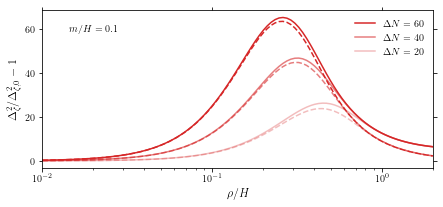

In [5]:
fig = plt.figure(figsize = (7, 3))
fig.subplots_adjust(bottom = 0.15)
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(bottom = "on", top = "on", left = "on", right = "on")
ax.set_yticks([0, 20, 40, 60])
ax.tick_params(axis = 'both', labelsize = 10)

ax.set_xlim(1e-2, 2)

P0, m = 0.5, 0.1
#DeltaN = 60
DeltaP = (P_DeltaN60 - P0)/P0
DeltaP_approx = lightfield(rho = rho, m = m, DeltaN = 60)
ax.semilogx(rho, DeltaP, label = "$\Delta N = 60$", color = "C3")
ax.semilogx(rho, DeltaP_approx/DeltaP_approx[0]*DeltaP[0], color = "C3", ls = "--")

#DeltaN = 40
DeltaP = (P_DeltaN40 - P0)/P0
DeltaP_approx = lightfield(rho = rho, m = m, DeltaN = 40)
ax.semilogx(rho, DeltaP, label = "$\Delta N = 40$", color = "C3", alpha = 0.6)
ax.semilogx(rho, DeltaP_approx/DeltaP_approx[0]*DeltaP[0], color = "C3", ls = "--", alpha = 0.6)

#DeltaN = 20
DeltaP = (P_DeltaN20 - P0)/P0
DeltaP_approx = lightfield(rho = rho, m = m, DeltaN = 20)
ax.semilogx(rho, DeltaP, label = "$\Delta N = 20$", color = "C3", alpha = 0.3)
ax.semilogx(rho, DeltaP_approx/DeltaP_approx[0]*DeltaP[0], color = "C3", ls = "--", alpha = 0.3)

plt.text(0.02, 60, "$m/H = 0.1$", ha = 'center', va = 'center')
ax.set_xlabel("$\\rho/H$", fontsize = 12)
ax.set_ylabel("$\Delta_{\zeta}^2/\Delta_{\zeta, 0}^2 - 1$", fontsize = 12)
ax.legend(frameon = False)